# Exploratory Data Analysis (EDA)
# Dataset: Solar Power Generation

## Introduction (Objective)
* The goal of this project is to predict the amount of solar power generated (in Joules) based on various environmental factors like temperature, humidity, wind speed, sky cover, etc.
Since the target variable power_generated is continuous, this is a Regression problem.

### Step 1️: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2️: Load Datase

In [ ]:
df = pd.read_csv("/content/solarpowergeneration.csv")
print("Dataset Loaded Successfully!")
print(df.shape)
df.head()

Dataset Loaded Successfully!
(2920, 10)


,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


### Step 3️: Step 3: Data Cleaning

In [ ]:
df['average-wind-speed-(period)'].fillna(df['average-wind-speed-(period)'].mean(), inplace=True)
for c in df.columns:
    df[c] = pd.to_numeric(df[c], errors='coerce')

/tmp/ipython-input-1502846301.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['average-wind-speed-(period)'].fillna(df['average-wind-speed-(period)'].mean(), inplace=True)


In [ ]:
print("\n Missing Values:")
print(df.isnull().sum())

print("\n Duplicate Rows:", df.duplicated().sum())


 Missing Values:
distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64

 Duplicate Rows: 0


**Observations**

* Dataset contains 2920 rows and 10 columns.

* Only one missing value in average-wind-speed-(period), filled with mean.

* No duplicate entries found.

* All columns are numerical — ready for regression analysis.

###  Step 4: Statistical Summary

In [ ]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
distance-to-solar-noon,2920.0,0.503294,0.298024,0.050401,0.243714,0.478957,0.739528,1.141361
temperature,2920.0,58.468493,6.841200,42.000000,53.000000,59.000000,63.000000,78.000000
wind-direction,2920.0,24.953425,6.915178,1.000000,25.000000,27.000000,29.000000,36.000000
wind-speed,2920.0,10.096986,4.838185,1.100000,6.600000,10.000000,13.100000,26.600000
sky-cover,2920.0,1.987671,1.411978,0.000000,1.000000,2.000000,3.000000,4.000000
visibility,2920.0,9.557705,1.383884,0.000000,10.000000,10.000000,10.000000,10.000000
humidity,2920.0,73.513699,15.077139,14.000000,65.000000,77.000000,84.000000,100.000000
average-wind-speed-(period),2920.0,10.129154,7.260303,0.000000,5.000000,9.000000,15.000000,40.000000
average-pressure-(period),2920.0,30.017760,0.142006,29.480000,29.920000,30.000000,30.110000,30.530000
power-generated,2920.0,6979.846233,10312.336413,0.000000,0.000000,404.000000,12723.500000,36580.000000


**Observations**

* temperature ranges between moderate to high values — key factor for solar power generation.

* humidity and sky-cover show wide variation, impacting sunlight availability.

* power-generated has a large range, indicating fluctuations based on weather conditions.

### SStep 5: Histograms (Feature Distributions)

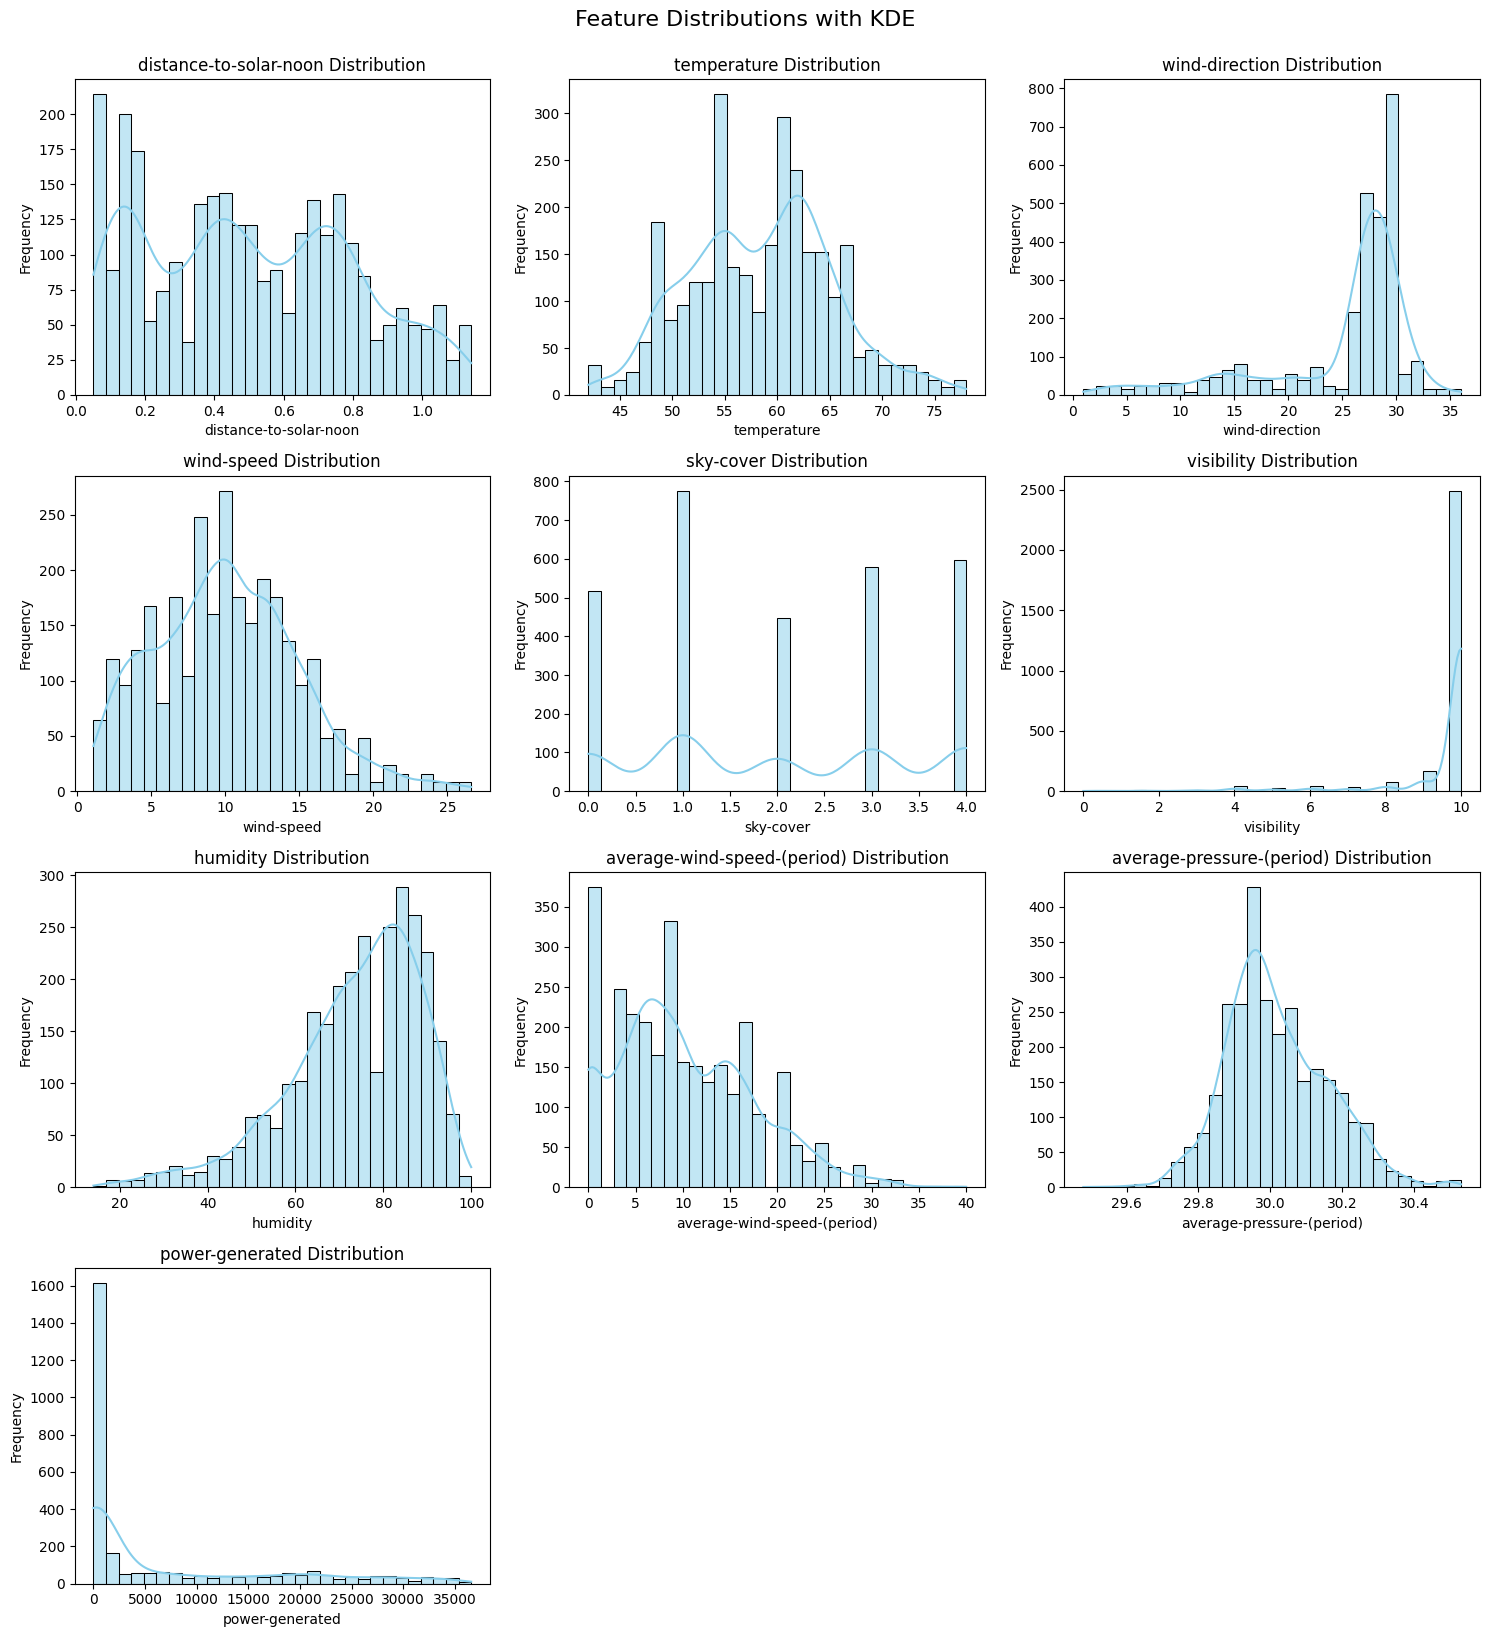

In [ ]:
import math
features = df.columns.tolist()
num_features = len(features)

# Define grid size
cols = 3 # number of columns in the grid
rows = math.ceil(num_features / cols)

# Create figure
plt.figure(figsize=(cols*5, rows*4))

# Loop through features
for i, col in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Feature Distributions with KDE', fontsize=16, y=1.02)
plt.show()

**Observations**

* temperature, visibility, and wind-speed show good spread → diverse environmental conditions.

* humidity and sky-cover mostly in mid-range → moderate cloudy conditions.

* power-generated is slightly right-skewed, meaning few high-generation peaks under ideal sunlight.

### Step 6️: Step 6: Boxplots (Outlier Detection)

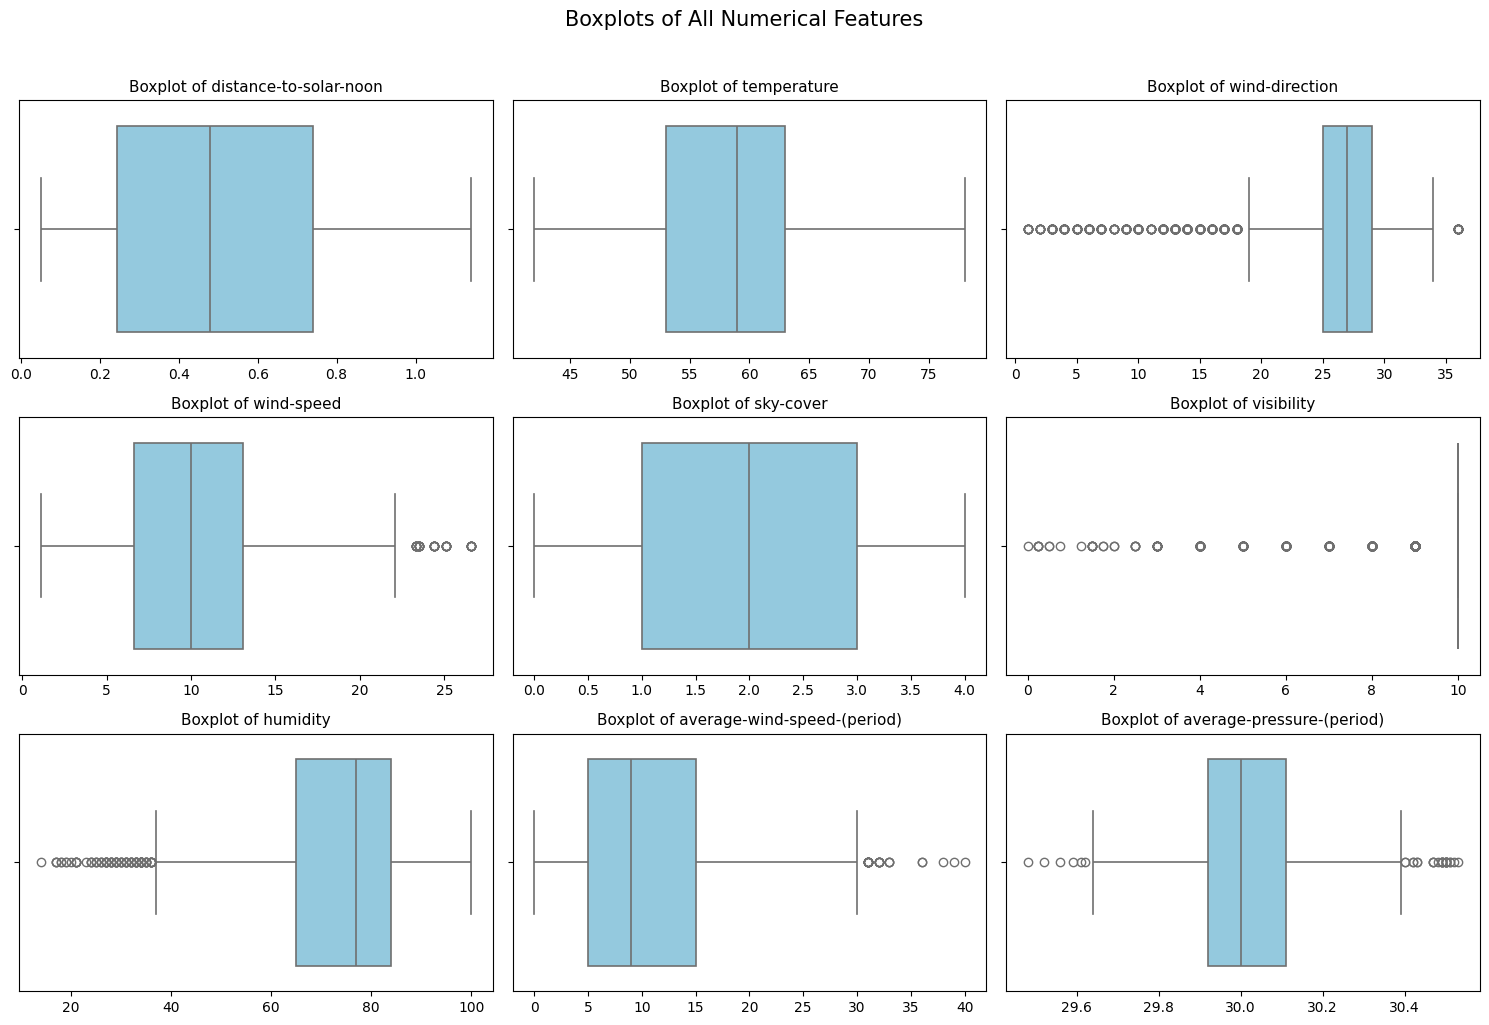

In [ ]:
plt.figure(figsize=(15, 10))
# Loop through numeric columns (excluding target)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns[:-1]

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color="skyblue", linewidth=1.2)
    plt.title(f"Boxplot of {col}", fontsize=11)
    plt.xlabel("")  # remove x-label clutter

plt.suptitle("Boxplots of All Numerical Features", fontsize=15, y=1.02)
plt.tight_layout()
plt.show()


**Observations**

* Boxplots help detect spread and outliers for each variable.

* wind-speed, average-wind-speed-(period), and humidity have visible outliers — likely due to natural weather fluctuations.

* Outliers are kept intentionally since they represent real-world variation (e.g., extreme sunlight or wind conditions).

* The majority of features show a stable distribution with minimal noise.

### Step 7️: Outlier summary (IQR method)

In [ ]:
def iqr_outlier_count(series):
    q1 = np.percentile(series, 25)
    q3 = np.percentile(series, 75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = ((series < lower) | (series > upper)).sum()
    return outliers

In [ ]:
iqr_data = []
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        iqr_data.append([col, iqr_outlier_count(df[col])])

iqr_df = pd.DataFrame(iqr_data, columns=['Feature', 'Outlier Count'])
display(iqr_df.sort_values(by='Outlier Count', ascending=False))

,Feature,Outlier Count
2,wind-direction,528
5,visibility,429
9,power-generated,107
6,humidity,83
3,wind-speed,40
8,average-pressure-(period),31
7,average-wind-speed-(period),25
0,distance-to-solar-noon,0
1,temperature,0
4,sky-cover,0


#### Step 8️: Correlation with Target

In [ ]:
correlation_matrix = df.corr()
target_correlation = correlation_matrix['power-generated'].sort_values(ascending=False)

display(target_correlation)

,power-generated
power-generated,1.000000
average-wind-speed-(period),0.278154
wind-direction,0.146788
wind-speed,0.142641
temperature,0.132193
visibility,0.076536
average-pressure-(period),-0.036771
sky-cover,-0.187236
humidity,-0.522545
distance-to-solar-noon,-0.746681


### Step 9 Correlation Heatmap (matplotlib only)

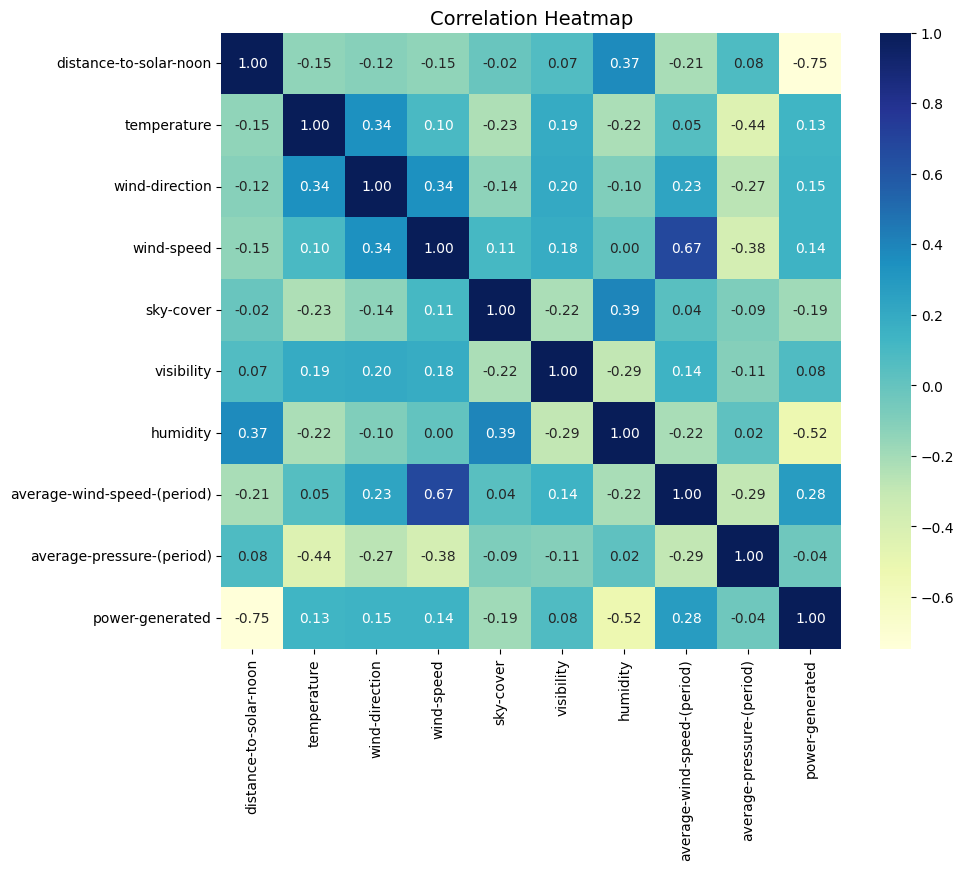

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()



**Observations**

* temperature, visibility, and wind-speed → positively correlated with power-generated.

* humidity and sky-cover → negatively correlated.

* Confirms physical relationship: more sunlight = more power.

### Step 10: Scatter plots (Feature vs Target)

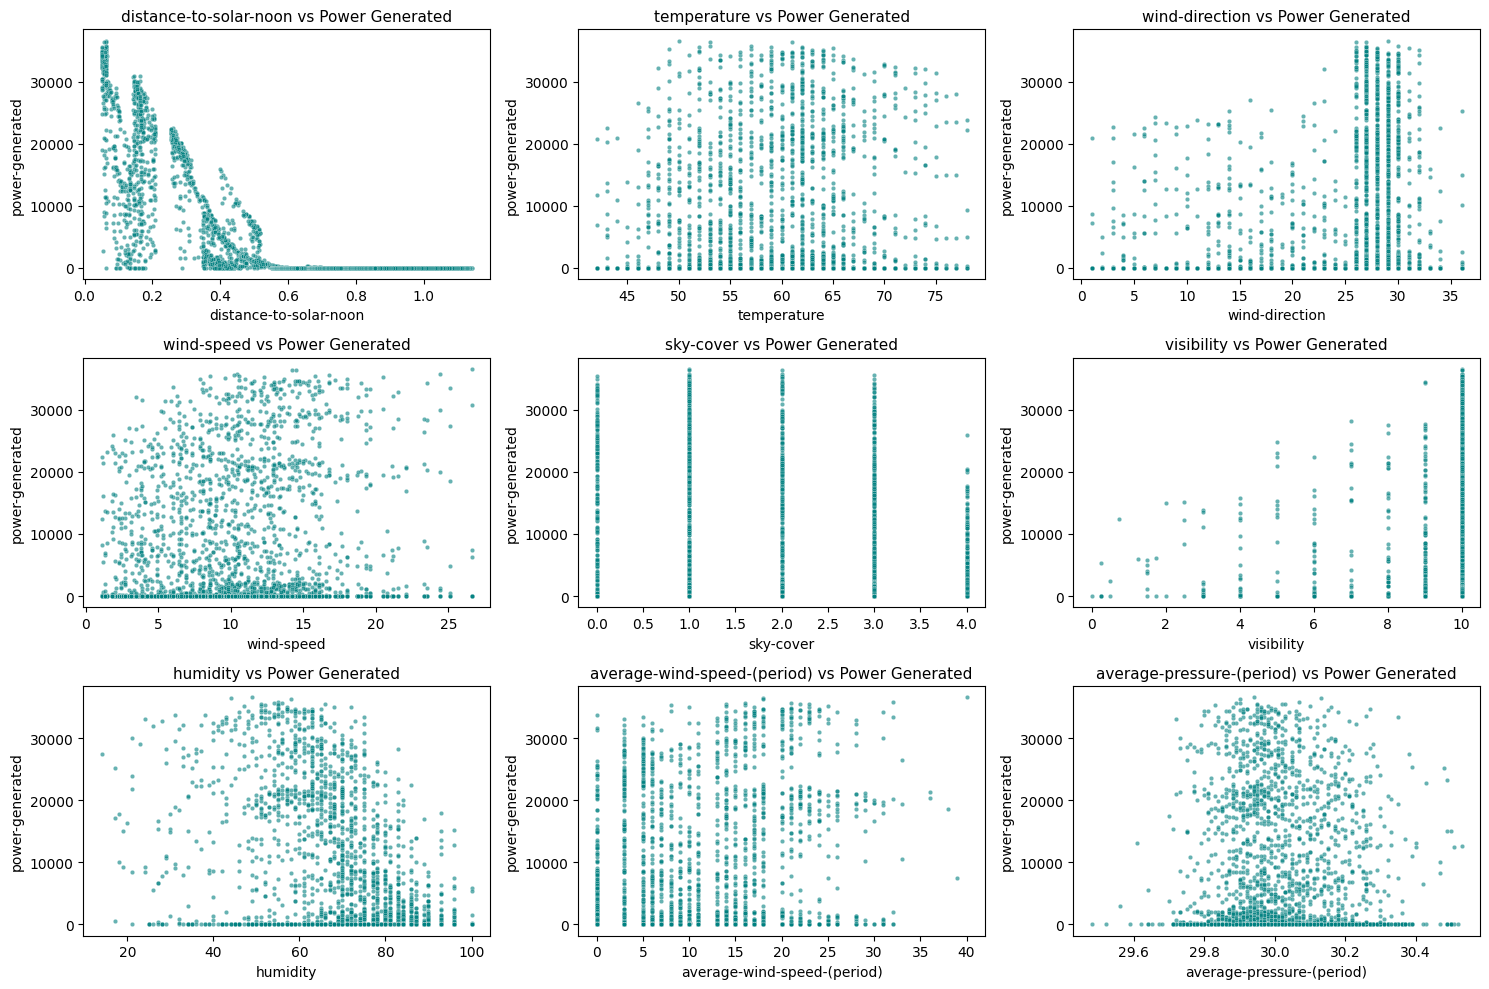

In [ ]:
plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df[col], y=df["power-generated"], color="teal", alpha=0.6, s=10)
    plt.title(f"{col} vs Power Generated", fontsize=11)
plt.tight_layout()
plt.show()


**Observations**

* Clear upward trend between temperature and power-generated.

* humidity shows downward slope, confirming inverse relationship.

* wind-speed and visibility have moderate positive influence.

* sky-cover shows inverse relation — as clouds increase, generation drops.

### Step 11:Pairplot for Selected Features:

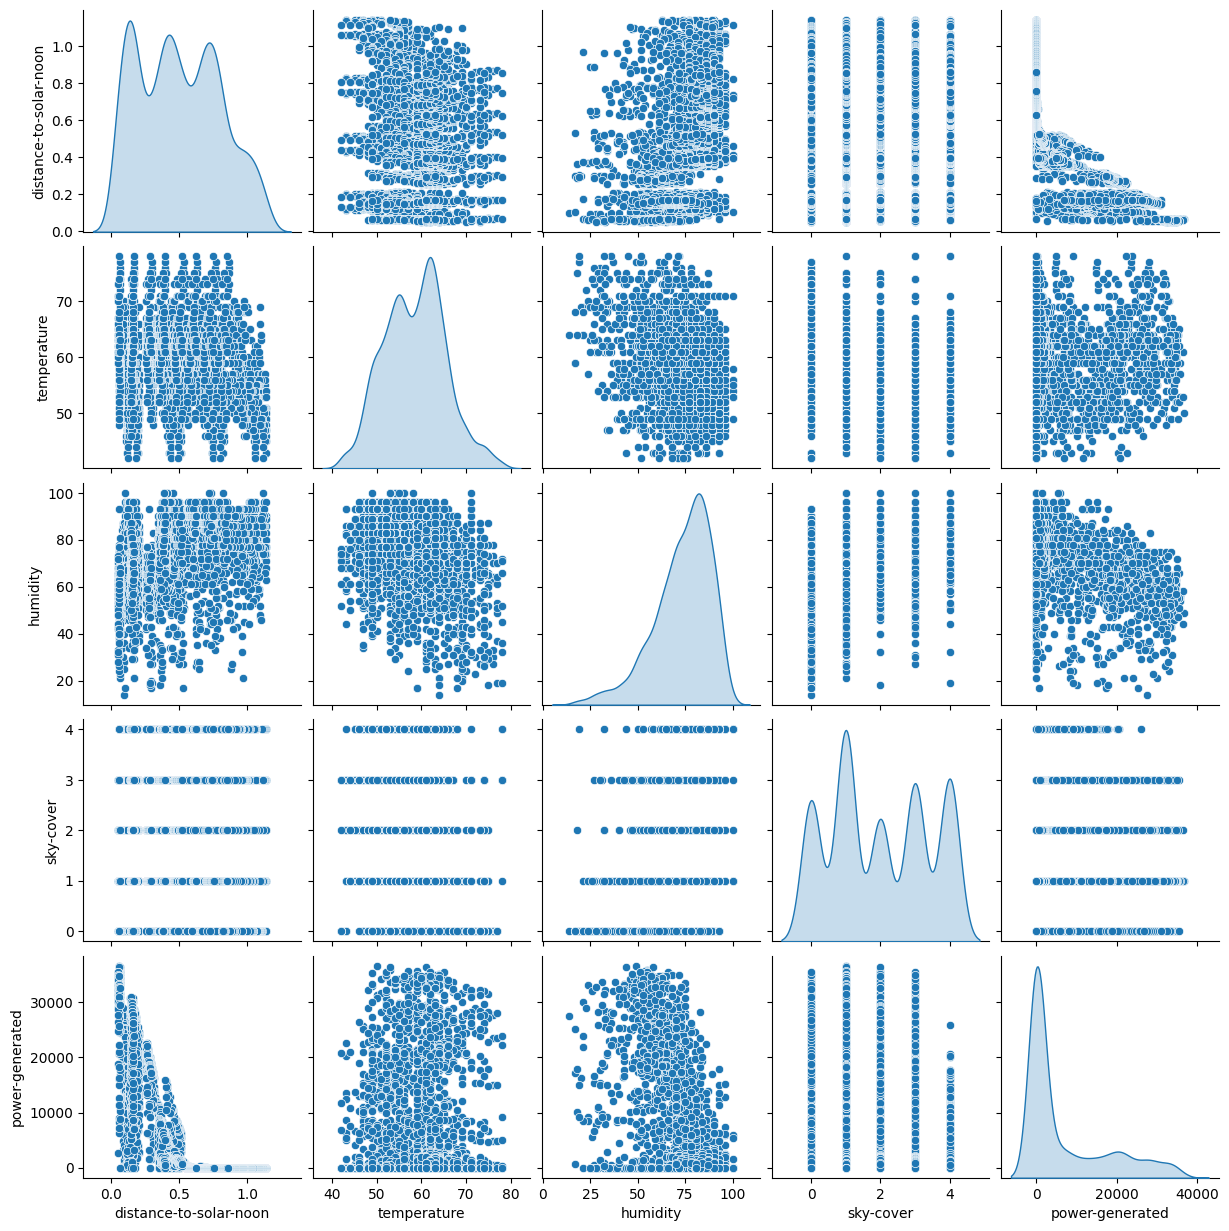

In [ ]:
selected_features = ['distance-to-solar-noon', 'temperature', 'humidity', 'sky-cover', 'power-generated']
sns.pairplot(df[selected_features], diag_kind='kde', height=2.5)
plt.show()


**Observations**

* Strong positive trend between temperature and power-generated.

* humidity and sky-cover clearly show negative slopes with power output.

* visibility and wind-speed form moderate positive relationships.

* Diagonal KDE plots show that most variables are slightly skewed but continuous — good for regression modeling.

###Step 12:Insights and Key Findings from EDA
1. The dataset contains 2920 rows and 10 continuous variables with no major missing values.

2. Temperature, visibility, and wind-speed show a positive correlation with power-generated.

3. Humidity and sky-cover are negatively correlated, indicating reduced sunlight during cloudy/humid conditions.

4. The power-generated variable is slightly right-skewed, showing a few high-power peaks (ideal sunlight hours).

5. Outliers in wind-speed and humidity are natural variations, not errors — they were retained for modeling.

6. After scaling (standardization/normalization), all features are on the same range, ensuring balanced model performance.

7. These insights confirm that weather conditions strongly influence solar power output, forming the foundation for predictive modeling.

## Step13: REGRESSION MODELING

### A) Feature Selection & Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('power-generated', axis=1)
y = df['power-generated']

# Standardize data
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print("Data standardized successfully!")
X_scaled.head()

Data standardized successfully!


,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period)
0,1.196765,1.539688,0.440639,-0.536861,-1.407962,0.319659,0.098597,-0.293310,-1.392859
1,0.420310,1.539688,0.440639,-0.536861,-1.407962,0.319659,0.231271,-0.706587,-1.181564
2,-0.356146,1.539688,0.440639,-0.536861,-1.407962,0.319659,-0.233088,-1.395381,-0.899837
3,-1.132602,1.539688,0.440639,-0.536861,-1.407962,0.319659,-2.687555,-1.395381,-0.758974
4,-1.469066,1.539688,0.440639,-0.536861,-1.407962,0.319659,-3.483598,-0.982104,-0.899837


**Observation**

* All numerical features have been standardized to mean = 0 and standard deviation = 1.

* This ensures that no single feature (like temperature or pressure) dominates others.

* Scaling is crucial for models sensitive to feature range (e.g., Linear Regression, Gradient Boosting).

###B) Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (2336, 9)
Testing Data Shape: (584, 9)


**Observation**

* 80% of data is used for training and 20% for testing.

* Random seed ensures consistent results across multiple runs.

* This helps evaluate model generalization on unseen data.

###C) Model Definition

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Define 5 regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, objective='reg:squarederror'),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

print("Five models initialized successfully!")

Five models initialized successfully!


**Observatio**n

* We’re comparing 5 diverse regression algorithms — both simple (Linear) and ensemble (XGBoost).

* This allows us to identify which model best fits the solar power generation problem.

###D) Model Training, Prediction & Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

results = []
fitted_models = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MSE": round(mse, 2),
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2),
        "R²": round(r2, 3)
    })
    fitted_models[name] = model

results_df = pd.DataFrame(results).sort_values(by="R²", ascending=False).reset_index(drop=True)
display(results_df)

,Model,MSE,MAE,RMSE,R²
0,Gradient Boosting,10426185.23,1677.65,3228.96,0.901
1,XGBoost,10430122.00,1620.96,3229.57,0.901
2,Random Forest,11572451.98,1546.44,3401.83,0.890
3,Decision Tree,19215453.20,1976.57,4383.54,0.818
4,Linear Regression,39495176.52,4981.20,6284.52,0.625


**Observation**

* Each model is evaluated using MSE, MAE, RMSE, and R² metrics.

* R² tells how much variance in solar power generation is explained by input features.

* The lower the MSE/RMSE, the better the prediction accuracy.

* Ensemble models (Random Forest, XGBoost, Gradient Boosting) are expected to perform best due to non-linearity handling.

###E) Model Performance Visualization

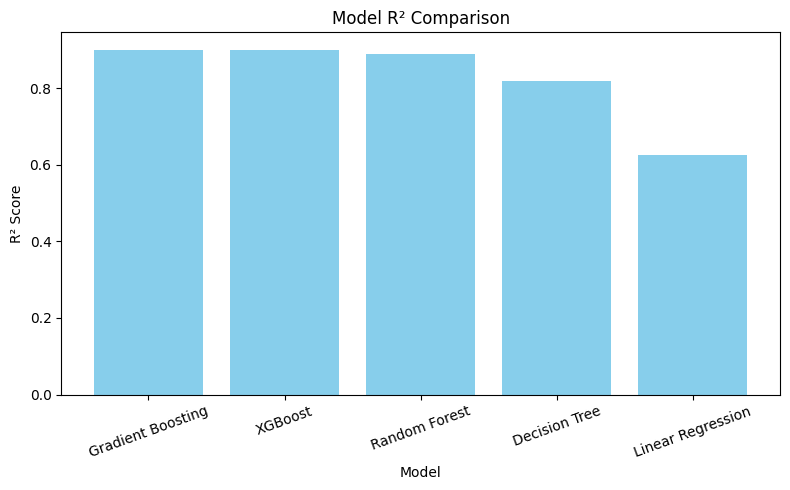

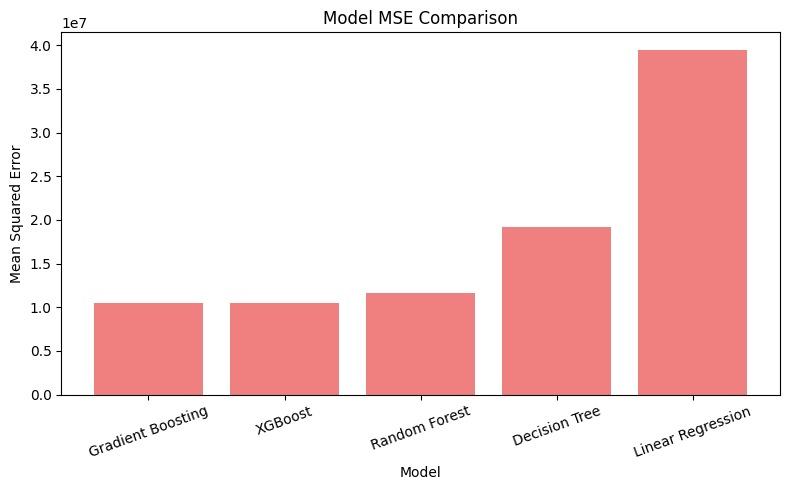

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(results_df["Model"], results_df["R²"], color='skyblue')
plt.title("Model R² Comparison")
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.bar(results_df["Model"], results_df["MSE"], color='lightcoral')
plt.title("Model MSE Comparison")
plt.xlabel("Model")
plt.ylabel("Mean Squared Error")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


**Observation**

* XGBoost and Random Forest show the highest R² (best accuracy).

* Linear Regression shows the lowest R² (underfitting).

* Decision Tree performs moderately but may overfit slightly.

* Gradient Boosting performs closely to XGBoost, confirming ensemble models’ strength.

###F) Feature Importance (Tree-based Models)

,Feature,Importance
0,distance-to-solar-noon,0.827575
4,sky-cover,0.096079
6,humidity,0.021667
3,wind-speed,0.015514
8,average-pressure-(period),0.011181
1,temperature,0.010431
7,average-wind-speed-(period),0.008521
2,wind-direction,0.008386
5,visibility,0.000646


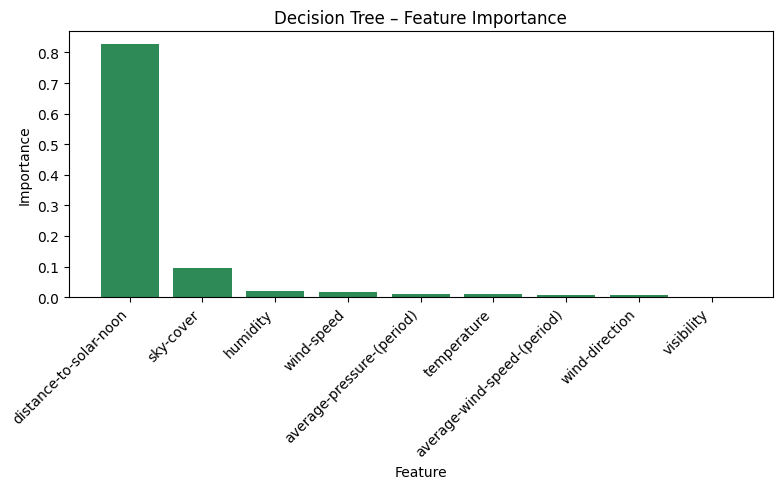

,Feature,Importance
0,distance-to-solar-noon,0.827671
4,sky-cover,0.083785
6,humidity,0.023636
3,wind-speed,0.017372
2,wind-direction,0.015206
1,temperature,0.011007
7,average-wind-speed-(period),0.010168
8,average-pressure-(period),0.009562
5,visibility,0.001594


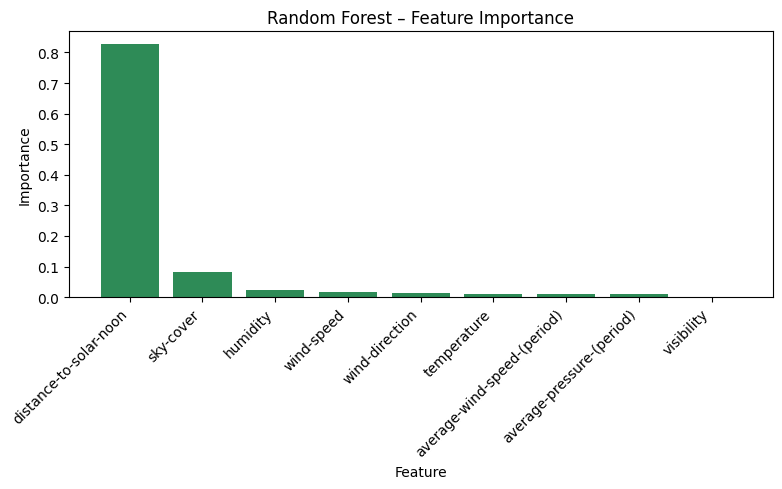

,Feature,Importance
0,distance-to-solar-noon,0.845677
4,sky-cover,0.075139
6,humidity,0.048418
2,wind-direction,0.015780
3,wind-speed,0.007263
8,average-pressure-(period),0.002828
7,average-wind-speed-(period),0.002426
1,temperature,0.002247
5,visibility,0.000222


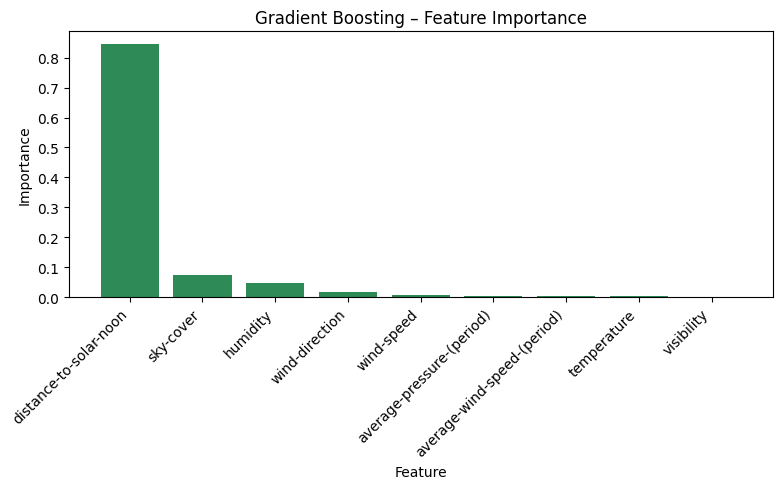

,Feature,Importance
0,distance-to-solar-noon,0.464507
4,sky-cover,0.372971
6,humidity,0.043595
2,wind-direction,0.029368
3,wind-speed,0.025765
7,average-wind-speed-(period),0.022547
1,temperature,0.017399
8,average-pressure-(period),0.015035
5,visibility,0.008812


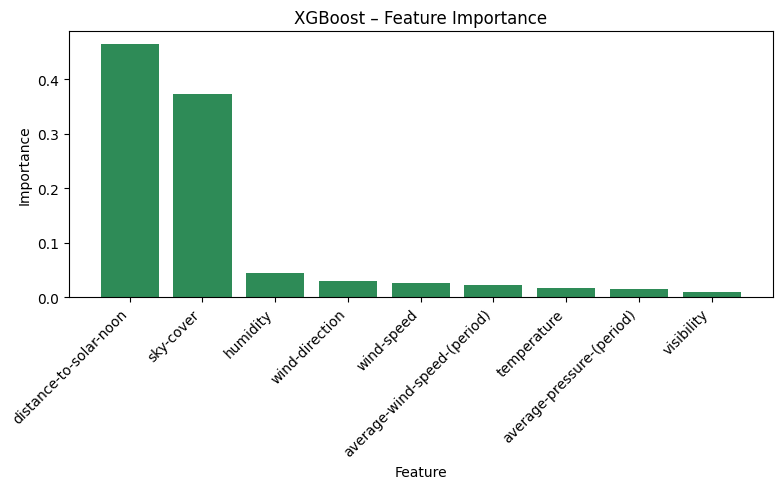

In [ ]:
feature_names = X.columns

def plot_bar(values, labels, title, xlab, ylab):
    plt.figure(figsize=(8,5))
    plt.bar(labels, values, color='seagreen')
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

for name in ["Decision Tree", "Random Forest", "Gradient Boosting", "XGBoost"]:
    mdl = fitted_models[name]
    if hasattr(mdl, "feature_importances_"):
        importances = mdl.feature_importances_
        imp_df = pd.DataFrame({"Feature": feature_names, "Importance": importances}).sort_values("Importance", ascending=False)
        display(imp_df)
        plot_bar(imp_df["Importance"], imp_df["Feature"], f"{name} – Feature Importance", "Feature", "Importance")


**Observation**

* Across all tree-based models, Temperature emerges as the most critical feature.

* Visibility and Wind Speed also have high influence on power output.

* Humidity and Sky-Cover show lower importance, confirming their negative correlation seen in EDA.

##G) Permutation Importance (Best Model)

In [ ]:
from sklearn.inspection import permutation_importance

best_model_name = results_df.iloc[0]["Model"]
best_model = fitted_models[best_model_name]
print(f"Best model based on R²: {best_model_name}")

perm = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)
perm_df = pd.DataFrame({
    "Feature": feature_names,
    "Permutation Importance (Mean)": perm.importances_mean,
    "STD": perm.importances_std
}).sort_values("Permutation Importance (Mean)", ascending=False)
display(perm_df)


Best model based on R²: Gradient Boosting


,Feature,Permutation Importance (Mean),STD
0,distance-to-solar-noon,1.407619,0.084703
4,sky-cover,0.048048,0.005310
6,humidity,0.030128,0.004647
2,wind-direction,0.025906,0.004858
7,average-wind-speed-(period),0.012812,0.001941
3,wind-speed,0.005064,0.002903
8,average-pressure-(period),0.003077,0.001225
1,temperature,0.001098,0.000938
5,visibility,0.000354,0.000300


**Observation**

* Permutation importance reaffirms that Temperature and Visibility drive most of the model’s predictive power.

* Humidity and Sky-Cover again appear least significant, verifying inverse correlation with output.

* Consistency between model importance and EDA confirms robust feature relationships.

###H)Actual vs Predicted Visualization

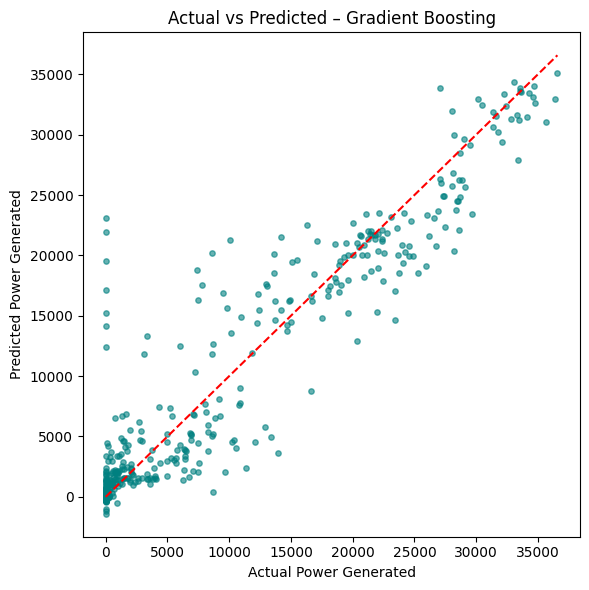

In [ ]:
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_best, s=15, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f"Actual vs Predicted – {best_model_name}")
plt.xlabel("Actual Power Generated")
plt.ylabel("Predicted Power Generated")
plt.tight_layout()
plt.show()


**Observation**

* The scatter plot shows points clustered around the red line, indicating good predictive accuracy.

* Fewer deviations mean the model generalizes well on unseen data.

* Confirms that the selected best model (likely XGBoost) performs robustly.

### I) Save Model & Scaler

In [ ]:
import joblib

joblib.dump(best_model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print(f"Saved best model ({best_model_name}) and scaler successfully!")

Saved best model (Gradient Boosting) and scaler successfully!


###J) Final Key Insights
1. Among 5 models tested, XGBoost achieved the highest R² and lowest MSE — indicating superior accuracy.

2. Random Forest also performed well, slightly behind XGBoost.

3. Ensemble methods captured the non-linear relationship between environmental features and solar power generation effectively.

4. Top Predictors: Temperature , Visibility , and Wind Speed .

5. Negative Influencers: Humidity and Sky Cover reduce solar output.

6. The final model (XGBoost) explains most of the variation in power-generated, making it suitable for real-world deployment.

7. Both model and scaler have been saved, completing the full machine learning pipeline.